# Visualization

<h1>Visualizing your data</h1>

<p>
<b>Quantitative Big Imaging - ETHZ: 227-0966-00L</b>
<br />

<div class='row'>
    <div class='column23'>
        <p style="font-size:1em;">April 17, 2025</p>
        <br /><br />
        <p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner</p>  
        <p style="font-size:1em;">Laboratory for Neutron Scattering and Imaging<br />Paul Scherrer Institut</p>
    </div>
    <div class='column13'>
        <img src="../../docs/figures/np_timing_4137191_000000.svg" style="height:300px" />
    </div>
</div> 

## Load needed modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from   skimage.morphology import label
from   skimage.measure import regionprops
import pandas as pd

from skimage.feature import corner_peaks, corner_harris, BRIEF
from skimage.transform import warp, AffineTransform
from skimage import data
from skimage.io import imread
from scipy.ndimage import distance_transform_edt
from skimage.filters import threshold_otsu

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

import numpy as np
import pydot

%load_ext autoreload
%autoreload 2
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('default')
sns.set_style("whitegrid", {'axes.grid': False})

%config InlineBackend.figure_format = 'retina'

# Presenting the results - bringing out the message

In the end you will want to present your results

<center>
<img src="figures/presentationmodes.svg" style="height:400px" />
</center>

```{figure} figures/presentationmodes.pdf
---
scale: 100%
---
Different ways to present your data.
```

## Visualization
One of the biggest problems with _big_ sciences is trying to visualize a lot of heterogeneous data. 
- Tables are difficult to interpret
- 3D Visualizations are very difficult to compare visually 
- Contradictory necessity of simple single value results and all of the data to look for trends and find problems

## Purpose of the visualization

You visualize your data for different reasons:

<div class="row">
<div class="column35">
        
1. __Understanding and exploration__
    - Small and known audience (you and colleagues)
    - High degree of understanding of specific topic.  
    
2. __Presenting your results__
    - Wider and sometimes unknown audience (reader of paper, person listening to presentation)
    - At best general understanding of the topic.
    
</div>
<div class="column25">
<img src="figures/Knaflic_audience.png" style='height:400px'/> 
    
from [Knaflic 2015](https://doi.org/10.1002/9781119055259)
    
</div></div>

```{figure} figures/Knaflic_audience.png
---
scale: 80%
---
The level of detail in a presentation depends on the medium it is presented [Knaflic 2015](https://doi.org/10.1002/9781119055259).
```

## Bad Graphs

<div class="row">
<div class="column35">

There are too many graphs which say:

- *my data is very complicated*
    
- *I know how to use __ toolbox in Python/Matlab/R/Mathematica*
    
- Most programs by default make poor plots
    
- Good visualizations takes time to produce
    
</div>
<div class="column25">
<img src="figures/scientific_paper_graph_quality_2x.png" style='height:300px'/>

[xkcd](https://xkcd.com/1945)
    
</div></div>

```{figure} figures/scientific_paper_graph_quality_2x.png
---
scale: 60%
---
This cartoon from [XKCD](https://xkcd.com/1945/) highlights a problem with the access to software making it too easy to produce a graph or illustration. Unfortunately, without any thoughts about information content and artistic or illustration rules.
```

### Some bad examples

There are plenty examples on how you shouldn't present your data. The problem is in general that there is way too much information that needs to be predigestend before it is ready to any audience.
```{figure} figures/badvisualizations.png
---
scale: 100%
---
Four examples of how _not_ to present your data.
```

<table>
    <tr><td><img src='figures/badImage1.png' style='height:400px'/></td><td><img src='figures/badPlot4.png' style='height:600px' /></td><td><img src='figures/badImage3.png' style='height:4 00px' /></td><td><img src='figures/badImage2.png' style='height:400px' /></td></tr></table>

## How to improve - Key Ideas 

There is a need to consciously prepare your figures to bring your message to the audience in an understandable way. The first step is to ask yourself the following questions.  

<div class="rows">
<div class="column13">
        
What is my message?
       
<center>
<img src="figures/noun-message-idea.svg" style="width:200px">
</center>
</div>        
<div class="column13">
                
Is it clearly communicated?

<center>
<img src="figures/noun-communication.svg" style="width:200px">
</center>
</div>
<div class="column13">
                        
Is it really necessary?
    
<center>
<img src="figures/noun-error.svg" style="width:200px">
</center>                        
</div>
</div>


- Does every line / color serve a purpose?
- Pretend ink is very expensive

Keep this in mind every time you create a figure and you will notice that after while you will have a tool set that makes it easier and faster to produce well thought figures that clearly brings out you message to your audience. 

Personally, I always write scripts to produce each plot of a publication. This makes it easier to revise the manuscript in a reproducible and efficient manner. The first implementation may take longer, but the revision is done in no time. 

### Some literature

These are some recommended books about data visualization:

- Knaflic, [Storytelling with Data: A Data Visualization Guide for Business Professionals](https://doi.org/10.1002/9781119055259), 2015

- Few, [Should data visualization always be beautiful?](https://www.perceptualedge.com/blog/?p=1169), 2012

### Simple rules

1. Never use 3D graphics when it can be avoided (unless you want to be deliberately misleading)
![Dumb 3d](figures/3dplot.png)
1. Pie charts can also be hard to interpret
1. Background color should almost always be white (not light gray)
1. Use color palettes adapted to human visual sensitivity 
1. Use colors and transparency smart


## Grammar of Graphics


### What is a grammar?
- Set of rules for constructing and validating a sentence
- Specifies the relationship and order between the words constituting the sentence

### How does grammar apply to graphics?
If we develop a consistent way of 
- expressing graphics (sentences) 
- in terms of elements (words) 
we can compose and decompose graphics easily


The most important modern work in graphical grammars is  
["The Grammar of Graphics"](https://doi.org/10.1007/0-387-28695-0)  by Wilkinson, Anand, and Grossman (2005). 

This work built on earlier work by Bertin (1983) and proposed a grammar that can be used to describe and construct a wide range of statistical graphics.


### Grammar Explained

Normally we think of plots in terms of some sort of data which is fed into a plot command that produces a picture
- In Excel you select a range and plot-type and click "Make"
- In Matlab you run ```plot(xdata,ydata,color/shape)``` 

1. These produces entire graphics (sentences) or at least phrases in one go and thus abstract away from the idea of grammar. 
1. If you spoke by finding entire sentences in a book it would be very ineffective, it is much better to build up word by word


### Grammar

<img src="figures/niceplot.svg" style="height:200px">

#### Separate the graph into its component parts

<br/>
<div class="row">
<div class="column14">
Data mapping  

$\begin{cases}var1 \rightarrow x\\var2 \rightarrow y\end{cases}$
</div>
<div class="column14"> 
Points
<img src="figures/niceplot_points.png" style="height:200px" />
</div>
<div class="column14">
Axes/Coordinates
<img src="figures/niceplot_axes.png"   style="height:200px" />
</div>
<div class="column14">
Labels/annotation   
<img src="figures/niceplot_annotations.png" style="height:200px" />
</div></div>


Construct graphics by focusing on each portion independently.

### Figure decorations

Besides the data you also need to provide annotating items to the visualization. 

It may seem unnescessary to list these annotations, but it happens too often that they are missing. This leaves the observers wondering about what they see in the figure. It is true that it takes a little more time to add annotation to your figure. Sometimes, you may think that the plot is only for your own understanding and you don't need to waste the time on making it complete. Still, in the next moment it finds its way to the presentation and then all of a sudden it is offical...
Annotations are fundamental features of figures and available in any plotting library. In some cases you have to look a little longer to find them or write a little more code to use them, but they are there.

#### Plots
- Curve legend - telling what each curve represents.
- Axis labels - tellning what information you see on each axis.
- Figure title - if you use multiples plots in the same figure.

#### Images
- Color bar - to tell how the colors are mapped to the values.
- Scale bar - to tell the size of the object in the image.

### Color maps revisited
Choosing the right color is a science.

<img src="figures/colormapselection.png" style="height:700px" />

[Crameri, F., et al. (2020)]( https://doi.org/10.1038/s41467-020-19160-7)

The choice depends on the type of data you want to present and how humans percieve different colors. Some combinations make it easier to highlight relevant features in the images. Still, you have to be cautious not put too much a priori information into the color map. 

```{figure} figures/colormapselection.png
---
scale: 75%
---
Crameri et al. developed this decision flow chart to help you decide which type of color map is best suited for your data.
```

Visualization toolboxes provide a great collection of colormaps as we have seen several times already in this course. There are however cases when you have to define your own color map. An example is the colormap we created last week to be able to identify each item in a watershed segmented image.

## What is my message?
Plots to "show the results" or "get a feeling" are usually not good

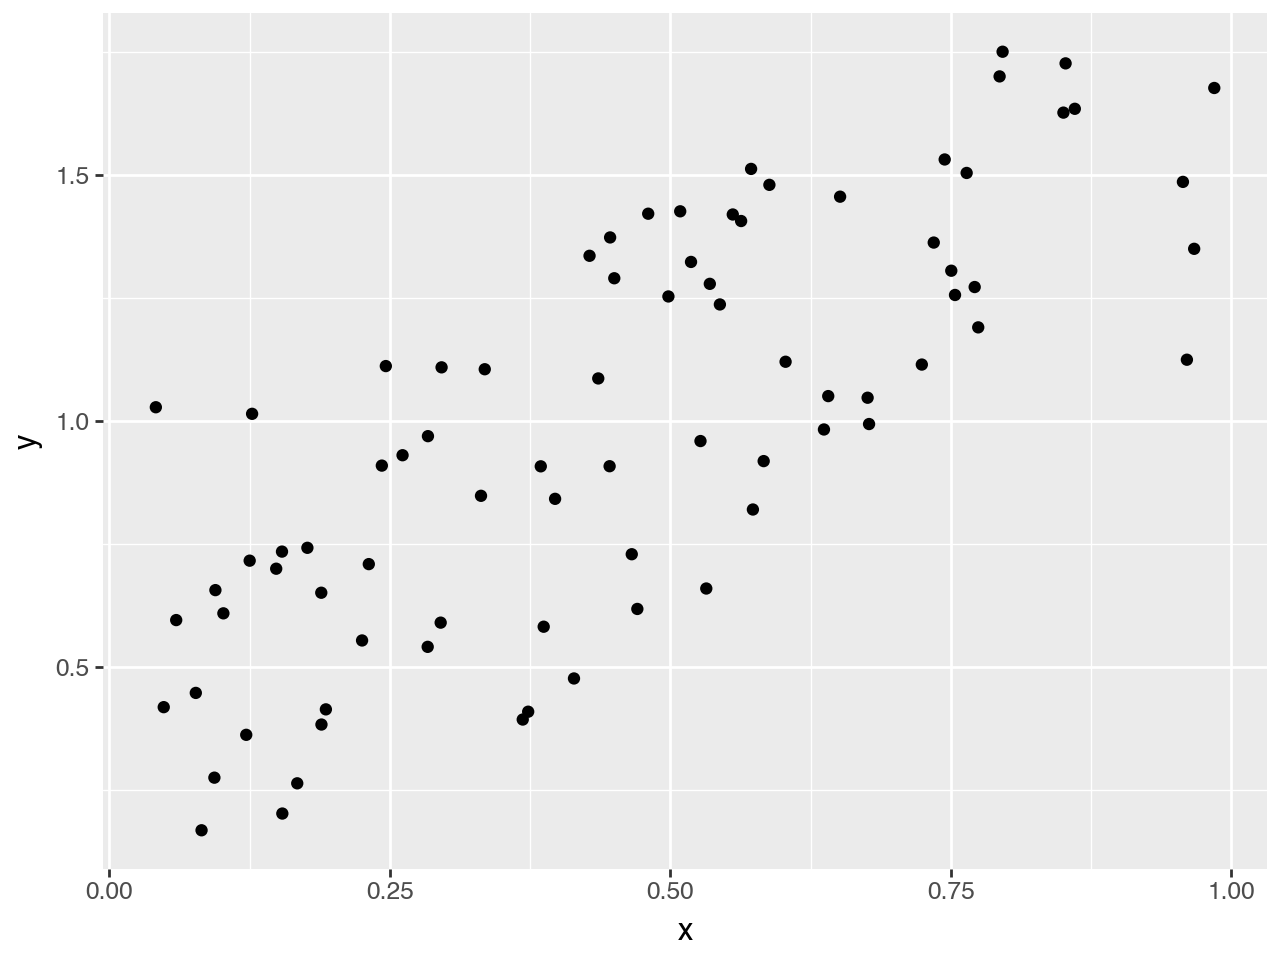

In [276]:
from plotnine import *
from plotnine.data import *
import pandas as pd
import numpy as np
# Some data
xd = np.random.rand(80)
yd = xd + np.random.rand(80)
zd = np.random.rand(80)

df = pd.DataFrame(dict(x=xd,y=yd,z=zd))
ggplot(df,aes(x='x',y='y')) + geom_point()

### Focus on a single, simple message
"X is a little bit correlated with Y"

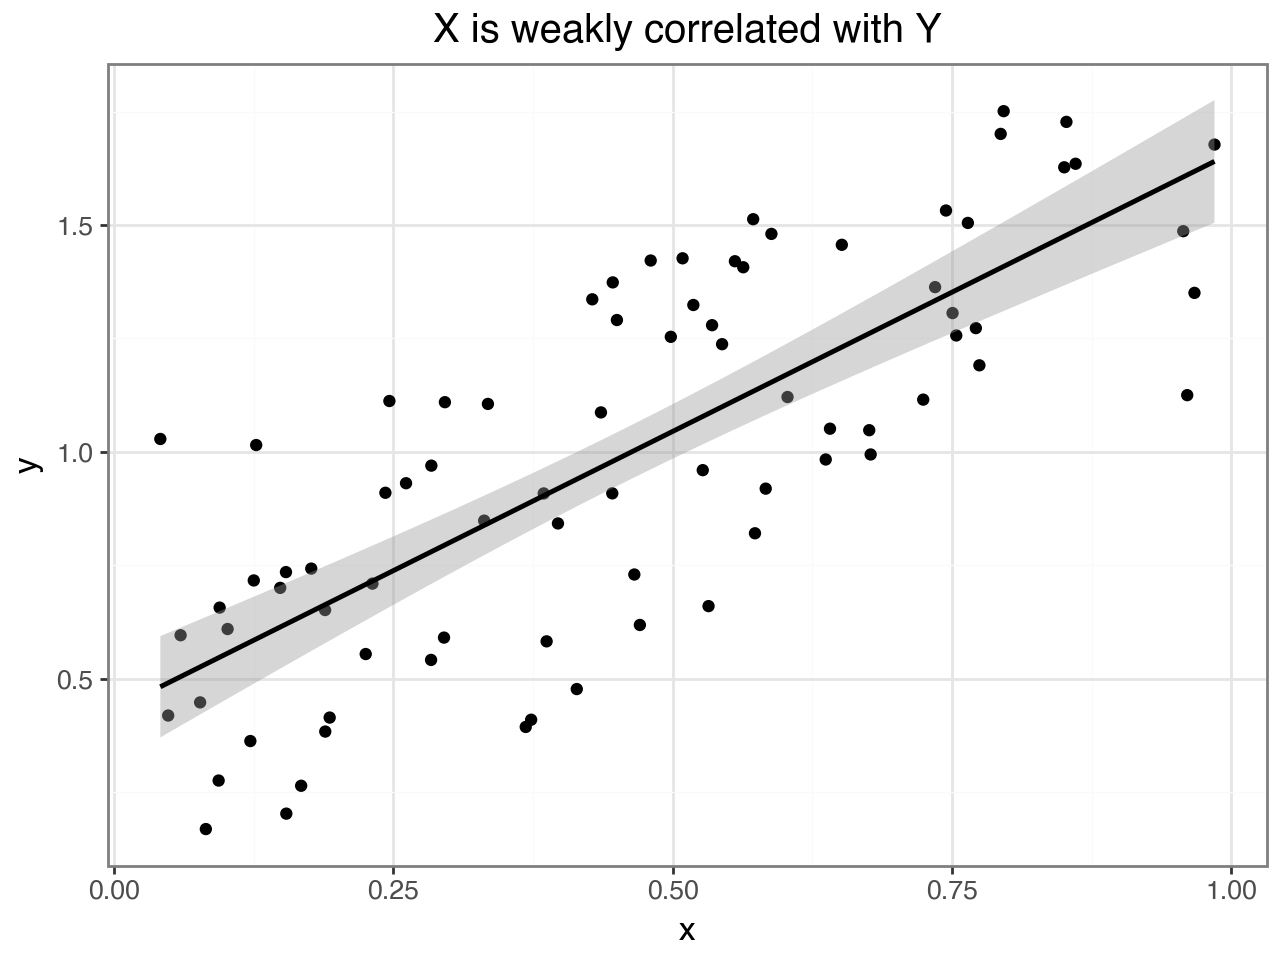

In [277]:
(ggplot(df,aes(x='x',y='y')) 
 + geom_point() 
 + geom_smooth(method="lm")
# + coord_equal() 
 + labs(title="X is weakly correlated with Y")
 + theme_bw(12) )

### Does my graphic communicate it clearly?

Too much data makes it very difficult to derive a clear message

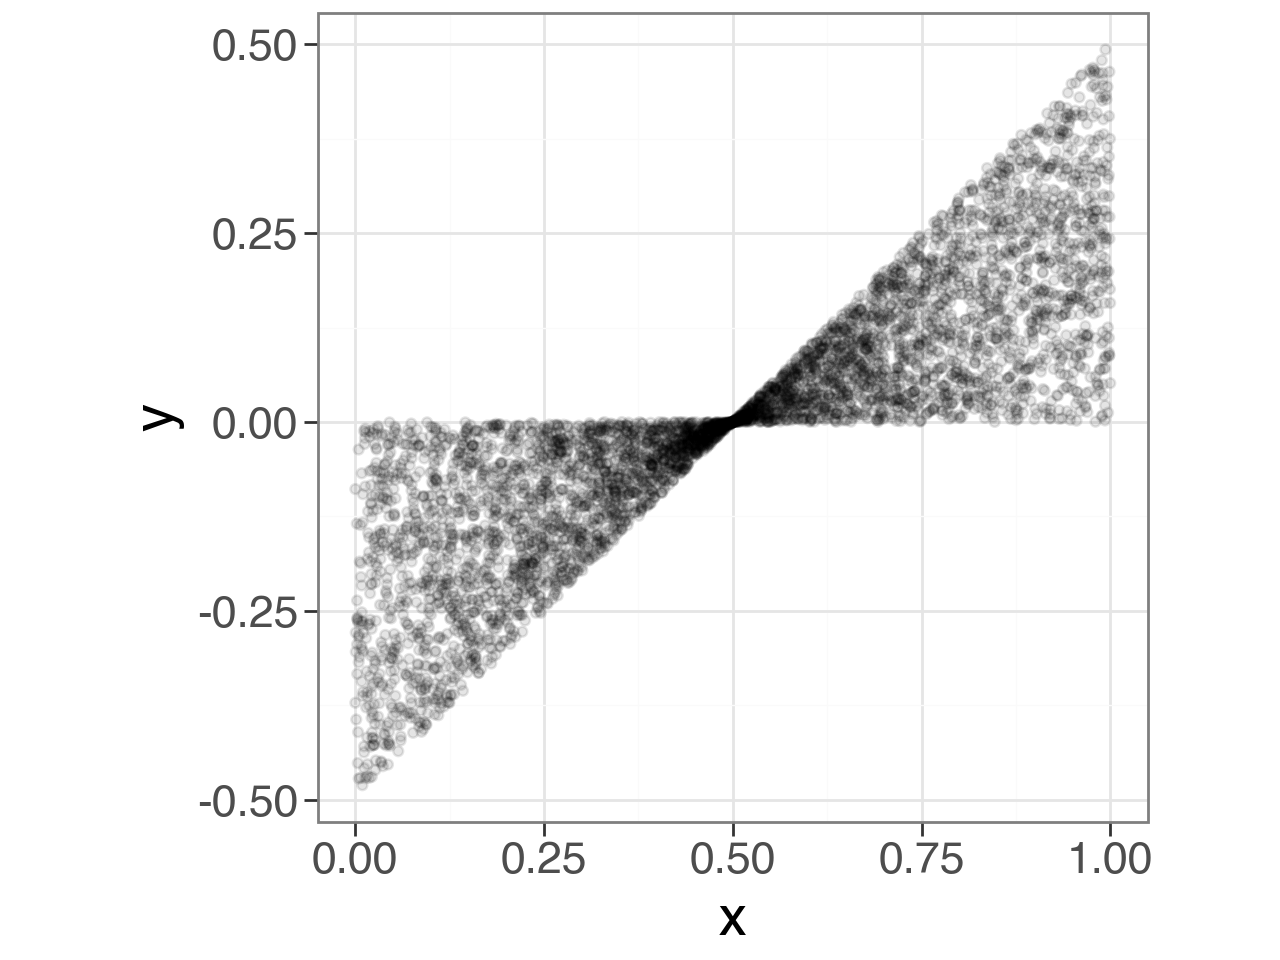

In [278]:
xd = np.random.rand(5000)
yd = (xd-0.5)*np.random.rand(5000)

df = pd.DataFrame(dict(x=xd,y=yd))
(ggplot(df,aes(x='x',y='y')) 
# + geom_point()
 + geom_point( alpha = 0.1 )
 + coord_equal()
 + theme_bw(20))

We have earlier used transparency to better visualize dense scatter plots. You can see the effect by setting the alpha parameter to geom_point. Using transparency is a qualitative way of showing higher density in the data.

### Reduce the data
Filter and reduce information until it is extremely simple

In this plot we create a density count view of the data by downsampling the grid and count the amount of points in each bin. It is related to a histogram but it count in space instead of in the intensity levels. 

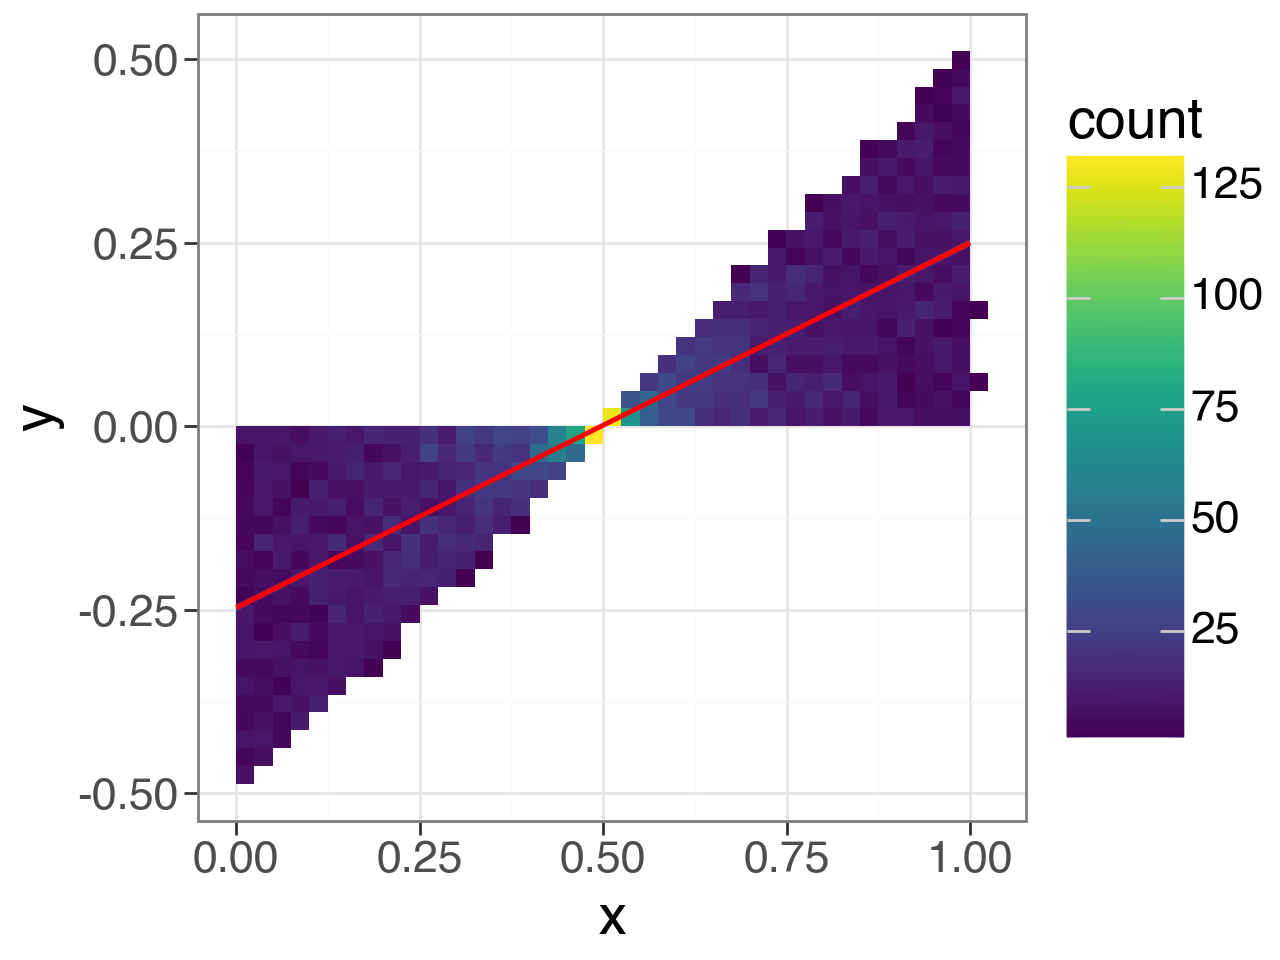

In [279]:
(ggplot(df,aes(x='x',y='y'))
 + stat_bin_2d(bins=40)
 + geom_smooth(method="lm",color='red')
 + coord_equal()
 + theme_bw(20)
 + guides(color='F')
)

Using this kind of plot allows us to measure how many points there are in each bin and thus we are now going towards a quantitative plot. The colorbar on the side helps us to interpret the colors.

### Reduce even further

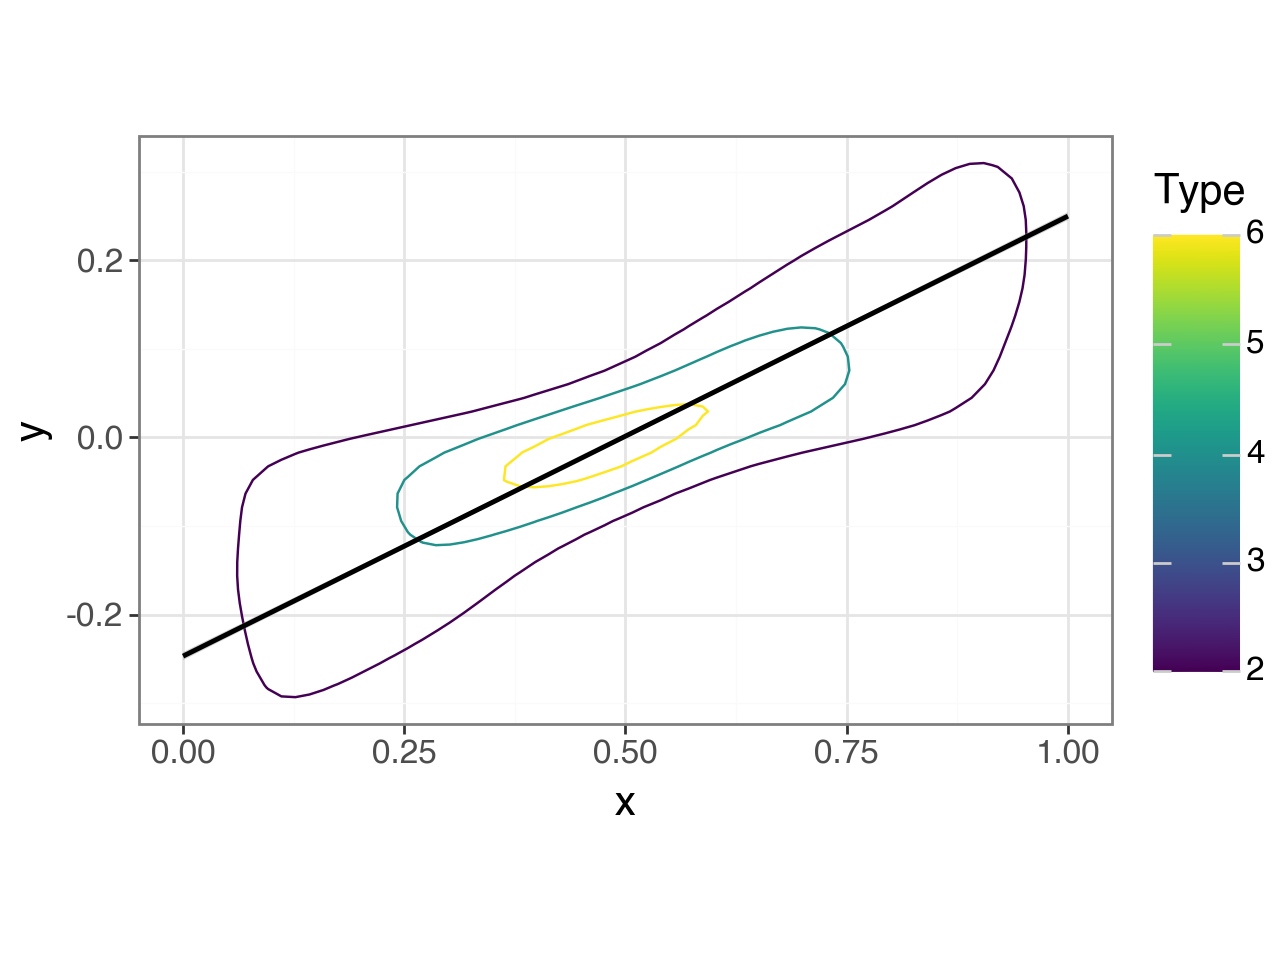

In [280]:
(ggplot(df,aes(x='x',y='y'))
  + geom_density_2d(aes(x='x', y='y', color='..level..'))
  + geom_smooth(method="lm")
  + coord_equal() 
  + labs(color="Type")
  + theme_bw(15)
)

## Common visualization packages for python

- Matplotlib [Matplotlib 3.0 Cookbook](https://www.packtpub.com/big-data-and-business-intelligence/matplotlib-30-cookbook) or [ETHZ lib](https://learning.oreilly.com/library/view/matplotlib-30-cookbook/9781789135718), [code examples](https://github.com/PacktPublishing/Matplotlib-3.0-Cookbook)
- Plotly
- Seaborn
- ggplot [R using the ggplot2 library](https://doi.org/10.1007/978-3-319-24277-4), which is ported to [python](https://www.datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python).

A short summary of these packages can be found [here](https://mode.com/blog/python-data-visualization-libraries/#:~:text=matplotlib%20is%20the%20O.G.%20of,language%20developed%20in%20the%201980s.).

# Summary

## Time series analysis
- Dynamic experiments
- Object tracking
- Registration
- Digital volume correlation (DIC)

## Visualization
- Visualization is the crowning piece of your investigation - make it count!
- Many toolboxes can be used, choose the one that fits your needs.